# Evolutionary models of risk and resilience

Animals show individual differences in basic stress reactivity (1) Genetic studies in humans originally focused on variants that acted as risk factors for negative behavioral and health outcomes. For example, genetic variants underlying the serotonergic system increase the risk of anxiety-related disorders (2). While some genotypes buffer against environmental stressors, there is some evidence that variants conferring risk in moderately and highly stressful environments may also be beneficial in environments of low stress (3).

Ellis and Boyce synthesized this theory and evidence as the Biological Sensitivity to Context (BSC) model (4-6). They suggested a U-shaped relationship between stress experienced during ontogeny and biological reactivity to the environment later in life. Individuals growing under moderate stress and psychosocial support develop a low biological sensitivity. Those born under conditions of either low or high stress should develop reactivity (sensitivity or vigilance) (7). However, while individuals with low sensitivity are buffered against moderate and even high stress, they are less receptive to the beneficial effects of good environments.These models were thus conceived in terms of evolutionary development but have yet to be explored formally. Mathematical analysis can help clarify how the distribution of underlying genetic factors affects the evolutionary dynamics of phenotypes like the stress response system. 

## Mathematical models of evolutionary development

The evolution of development can be explored using a general mathematical framework that ties together the distribution of underlying genetic and environmental factors, the joint contribution of each factor to the phenotype, and the relationship between the phenotype and fitness (8) The focus of such mathematical models is twofold:

1. to explore how selection changes the distribution of underlying factors and 
2. how the structure of the phenotype influences the evolution of its development.

Phenotypic development can be formalized and modeled by means of tensor analysis. A tensor is a multidimensional extension of a matrix, where the rank of the tensor indicates its dimensionality. A vector is a tensor of rank 1 while a matrix is a tensor of rank 2. The models are composed of several parts

- an equation specifying how the phenotype ($\phi$) is related to the genetic and environmental factors. The equation can be based on knowledge of the system being studied or on a theory of the phenotype's ontogeny.
$$\phi = f(g_1, g_2, \ldots g_k, e_1, e_2, \ldots e_n)$$
- $\mathbf{P}$ tensors of the moments of distributions of the underlying factors; $\mathbf{P}^1$ = means, $\mathbf{P}^2$ = (co)variances, $\mathbf{P}^3$ = multivariate skewnesses, $\mathbf{P}^4$ = multivariate kurtoses. $\mathbf{P}^n$ is represented as a tensor of rank $n$.
$$P^1 = \begin{bmatrix} \mathrm{E}[g_1] \\ \vdots \\  \mathrm{E}[g_k] \\ \mathrm{E}[e_1] \\ \vdots \\ \mathrm{E}[e_n] \end{bmatrix}$$
- $\mathbf{D}$ tensors specifying how the phenotype changes with changes in the underlying factors. Constructed as derivatives of the phenotypic function.
$$D^1 = \nabla_\phi \begin{bmatrix} \frac{\partial \phi}{\partial g_1}\\\vdots \\ \frac{\partial \phi}{\partial g_k} \\ \frac{\partial \phi}{\partial e_1} \\ \vdots \\ \frac{\partial \phi}{\partial e_n} \end{bmatrix}$$
- an equation specifying the relationship between phenotype and fitness ($w$).
$$w = g(\phi, e_m)$$
- $\mathbf{Q}$ vectors indicating how selection changes the distribution of the genetic factors; $\mathbf{Q}^1$ gives the change in means; $\mathbf{Q}^2$ the change in variances, and so on.
$$Q_a^k = \frac{\gamma}{\bar{w}} \frac{\partial^B w}{\partial \phi^B} \langle P^{A+k}, \otimes^i D^{a_i} \rangle$$
$$Q_1^1 = \frac{1}{\bar{w_r}} \frac{\partial w_r}{\partial \phi_r} \langle P^2, D^1 \rangle$$
$$\begin{eqnarray*} Q^2_1 & = & \frac{1}{\bar{w_r}} \frac{\partial w_r}{\partial \phi_r} \langle P^3, D^1 \rangle \\ Q^2_2 & = & \frac{1}{\bar{w_r}} \frac{\partial w_r}{\partial \phi_r} \langle P^4, D^2 \rangle \\ Q^2_{1,1} & = & \frac{1}{2\bar{w_r}} \frac{\partial^2 w_r}{\partial \phi_r^2} \langle P^4, D^1 \otimes D^1 \rangle \\ \Delta P^2_\mathrm{sel} & = & Q^2_1 + Q^2_2 + Q^2_{1,1} \end{eqnarray*}$$

### Tensor algebra

Analyzing phenotypic landscape models proceeds by multiplying tensors to determine how the distribution of underlying factors maps on to the phenotypic landscape. An inner product projects one tensor onto another tensor of smaller dimension, resulting in a tensor of rank equal to the difference in ranks of the two original tensors. For example, the 4th moments (kurtoses) of the underlying factors, $\mathbf{P}^4$ , maps onto the 2nd derivatives of fitness, $\mathbf{D}^2$ as

$$\langle P^4, D^2 \rangle_{i,j} = \sum_k \sum_l P^4_{i,j,k,l} D^2_{k,l}$$

resulting in a new tensor of rank 2 that is part of a $\mathbf{Q}^2$ vector influencing the 2nd moments (variances).

Phenotypic function. gi are genetic and ej environmental factors.

First central moment. A rank 1 tensor (vector) holds the means of each underlying factor. Subscripts index the elements: P1 = E[g1], Pk+1 = E[e1]   

## Model

In [4]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

### Phenotype

The U-shaped relationship between early stress and biological reactivity, ϕr, can be conveniently represented by a quadratic function specified by 3 genetic and 1 environmental factor

$$\phi_r = g_1 + g_3 (e_1 - g_2)^2$$

- $g_1$: genetic factor controlling the minimum possible reactivity.
- $g_2$: genetic factor controlling under what value of the environmental factor, e1, minimum reactivity occurs.
- $g_3$: genetic factor influencing the rate of increase (curvature) in reactivity under progressively more and less stress.
- $e_1$: environmental factor representing stress early in life (higher value equals more stress)   

In [5]:
# sy
g1, g2, g3, e1, e2 = symbols('g1 g2 g3 e1 e2')
phi_r = g1 + g3 * (e1 - g2)**2
phi_r

g1 + g3*(e1 - g2)**2

Text(0, 0.5, 'φ')

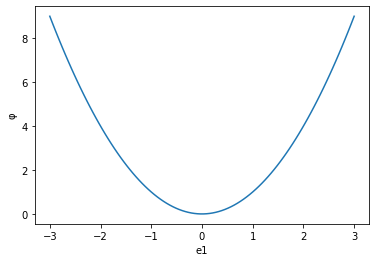

In [6]:
# function that lets us input an array of values for e1
phi_r_f = lambdify(e1, phi_r, 'numpy')

e1_range = np.linspace(-3, 3, 100)

fig, ax = plt.subplots()
ax.plot(e1_range, [phi.subs([(g1, 0), (g2, 0), (g3, 1)]) for phi in phi_r_f(e1_range)])
ax.set_xlabel('e1')
ax.set_ylabel('φ')

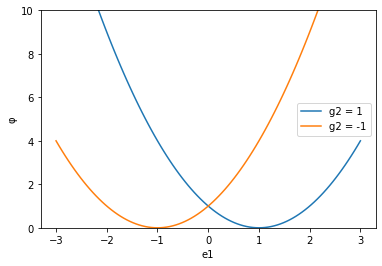

In [7]:
fig, ax = plt.subplots()
ax.plot(e1_range, [phi.subs([(g1, 0), (g2, 1), (g3, 1)]) for phi in phi_r_f(e1_range)], label='g2 = 1')
ax.plot(e1_range, [phi.subs([(g1, 0), (g2, -1), (g3, 1)]) for phi in phi_r_f(e1_range)], label='g2 = -1')
ax.set_xlabel('e1')  
ax.set_ylabel('φ')
ax.set_ylim([0, 10])
ax.legend()

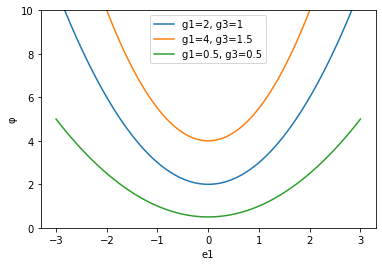

In [8]:
fig, ax = plt.subplots()
ax.plot(e1_range, [phi.subs([(g1, 2), (g2, 0), (g3, 1)]) for phi in phi_r_f(e1_range)], label='g1=2, g3=1')
ax.plot(e1_range, [phi.subs([(g1, 4), (g2, 0), (g3, 1.5)]) for phi in phi_r_f(e1_range)], label='g1=4, g3=1.5')
ax.plot(e1_range, [phi.subs([(g1, 0.5), (g2, 0), (g3, 0.5)]) for phi in phi_r_f(e1_range)], label='g1=0.5, g3=0.5')
ax.set_xlabel('e1')  
ax.set_ylabel('φ')
ax.set_ylim([0, 10])
ax.legend()

### Fitness

The key aspect of the fitness function is that buffered phenotypes should have fairly constant fitness across environments but achieve a lower maximum fitness under good environments. Reactive phenotypes, whether sensitive or vigilant, should have higher fitness in good environments and much lower fitness in poor environments. A simple linear function can be used to capture some of these characteristics. Fitness is therefore a function of the reactivity, $\phi_r$, and stress or adversity during the reproductive lifespan, $e_2$ (higher values indicate a more stressful environment).

$$w_r(\phi_r, e_2) = -\phi_r e_2$$

In [9]:
w_r = -phi_r*e2
w_r

e2*(-g1 - g3*(e1 - g2)**2)

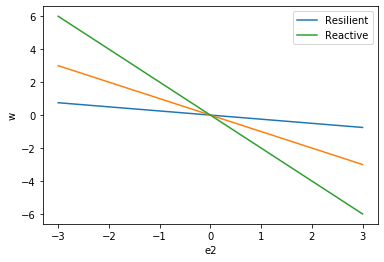

In [10]:
# function that to input an array of values for e1
w_r_f = lambdify(e2, w_r, 'numpy')

e2_range = np.linspace(-3, 3, 100)

fig, ax = plt.subplots()
ax.plot(e2_range, [w.subs([(g1, 0), (g2, 0), (g3, 1), (e1, 0.5)]) for w in w_r_f(e2_range)], label='Resilient')
ax.plot(e2_range, [w.subs([(g1, 0), (g2, 0), (g3, 1), (e1, 1)]) for w in w_r_f(e2_range)], label='')
ax.plot(e2_range, [w.subs([(g1, 0), (g2, 0), (g3, 1), (e1, sqrt(2))]) for w in w_r_f(e2_range)], label='Reactive')
ax.set_xlabel('e2')
ax.set_ylabel('w')
ax.legend()

Resilience phenotypes (lower values of $phi_r$) have similar fitness across the range of values for the late life environment ($e_2$). Reactive phenotypes (higher values of $phi_r$) have low fitness in poor environments (higher values of $e_2$) but high fitness in good environments (lower values of $e_2$).

## Evolutionary dynamics

The change in the means of the genetic factors is determined by the first derivative of fitness, the 2nd moments of the distribution, and the first derivatives of phenotype. 

$$Q_1^1 = \frac{1}{\bar{w_r}} \frac{\partial w_r}{\partial \phi_r} \langle P^2, D^1 \rangle$$

The model specification includes a 'good', low-stress environment (arbitrarily $e_1 = -1$) where fitness is constant across phenotypes. The direction of change is influenced primarily by the derivative of fitness

$$\frac{\partial w_r}{\partial \phi_r}$$

In [11]:
phi = symbols('phi')
diff(-e2*phi, phi)

-e2

The first dirivative of fitness is positive when the average environment is unstressful and negative when more stressful environments are common.

First derivative of the phenotype with respect to each factor

$$D^1 =  \begin{bmatrix} \frac{\partial \phi}{\partial g_1} \\ \frac{\partial \phi}{\partial g_2}\\ \frac{\partial \phi}{\partial g_3}\\ \frac{\partial \phi}{\partial e_1} \end{bmatrix}$$

In [12]:
D_1 = Matrix([diff(phi_r, g1), diff(phi_r, g2), diff(phi_r, g3), diff(phi_r, e1)])
D_1

Matrix([
[                1],
[g3*(-2*e1 + 2*g2)],
[     (e1 - g2)**2],
[ g3*(2*e1 - 2*g2)]])

$P^2$ is the matrix of variance/covariances of each factor

$$P^2 = \begin{bmatrix} V_{g_1,g_1} & V_{g_1, g_2} & V_{g_1, g_3} & V_{g_1, e_1} \\ V_{g_2,g_1} & V_{g_2, g_2} & V_{g_2, g_3} & V_{g_2, e_1} \\ V_{g_3,g_1} & V_{g_3, g_2} & V_{g_3, g_3} & V_{g_3, e_1} \\ V_{e_1,g_1} & V_{e_1, g_2} & V_{e_1, g_3} & V_{e_1, e_1} \end{bmatrix}$$

To keep track of them, label each componet as `PNN` where `n` is the nth component (1 = $g_1$, 2 = $g_2$, 3 = $g_3$, 4 = $e_1$).

In [13]:
P11, P12, P13, P14, P22, P23, P24, P33, P34, P44 = symbols('P11 P12 P13 P14 P22 P23 P24 P33 P34 P44')
P_2 = Matrix([[P11, P12, P13, P14], [P12, P22, P23, P24],[P13, P23, P33, P34], [P14, P24, P34, P44]])
P_2

Matrix([
[P11, P12, P13, P14],
[P12, P22, P23, P24],
[P13, P23, P33, P34],
[P14, P24, P34, P44]])

The inner product between the variance/covariance matrix $P^2$ and the first dirivitive of fitness $D^2$

$$\langle P^2, D^1 \rangle$$

In [57]:
def inner(M1, M2):
    return M1.T * M2

inner(P_2, D_1)

Matrix([
[P11 + P12*g3*(-2*e1 + 2*g2) + P13*(e1 - g2)**2 + P14*g3*(2*e1 - 2*g2)],
[P12 + P22*g3*(-2*e1 + 2*g2) + P23*(e1 - g2)**2 + P24*g3*(2*e1 - 2*g2)],
[P13 + P23*g3*(-2*e1 + 2*g2) + P33*(e1 - g2)**2 + P34*g3*(2*e1 - 2*g2)],
[P14 + P24*g3*(-2*e1 + 2*g2) + P34*(e1 - g2)**2 + P44*g3*(2*e1 - 2*g2)]])

Putting that all together and assuming the average fitness is 1

In [58]:
w_bar = 1.0
Q_1 = 1/w_bar * diff(-e2*phi, phi) * inner(P_2, D_1)
Q_1

Matrix([
[-1.0*e2*(P11 + P12*g3*(-2*e1 + 2*g2) + P13*(e1 - g2)**2 + P14*g3*(2*e1 - 2*g2))],
[-1.0*e2*(P12 + P22*g3*(-2*e1 + 2*g2) + P23*(e1 - g2)**2 + P24*g3*(2*e1 - 2*g2))],
[-1.0*e2*(P13 + P23*g3*(-2*e1 + 2*g2) + P33*(e1 - g2)**2 + P34*g3*(2*e1 - 2*g2))],
[-1.0*e2*(P14 + P24*g3*(-2*e1 + 2*g2) + P34*(e1 - g2)**2 + P44*g3*(2*e1 - 2*g2))]])

To start exploring the evolutionary dyanmics, we will assume the covariances are zero

In [59]:
Q_1_cov0 = Q_1.subs([(P12, 0), (P13, 0), (P14, 0), (P23, 0), (P24, 0), (P34, 0)])
Q_1_cov0

Matrix([
[                  -1.0*P11*e2],
[-1.0*P22*e2*g3*(-2*e1 + 2*g2)],
[     -1.0*P33*e2*(e1 - g2)**2],
[ -1.0*P44*e2*g3*(2*e1 - 2*g2)]])

The means of the genetic factors, ($g_1$, $g_2$, $g_3$), change in proportion to their variances but the direction of change is determined by the average quality of the environments early (e1) or late (e2) in life. 

The change in minimum reactivity $\Delta g_1$ is onl influenced by the variance in $g_1$, $P_{11}$ and the average late-life stress, $e_2$

In [63]:
Q_1_cov0[0]

-1.0*P11*e2

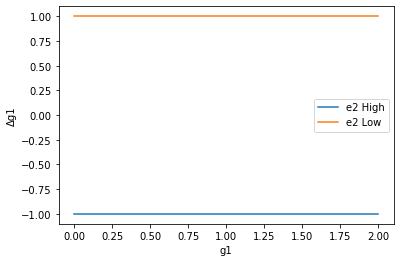

In [64]:
# change in each genetic factor as a function of itself when early/late environments are high/low (+/-) stress
delta_g1_e2high = lambdify(g1, Q_1_cov0[0].subs([(P11, 1), (e1, 0), (e2, 1)]), 'numpy')
delta_g1_e2low  = lambdify(g1, Q_1_cov0[0].subs([(P11, 1), (e1,0), (e2, -1)]), 'numpy')

g_range = np.linspace(0, 2, 100)

fig, ax = plt.subplots()
ax.plot(g_range, [delta_g1_e2high(g1) for g1 in g_range], label='e2 High')
ax.plot(g_range, [delta_g1_e2low(g1) for g1 in g_range], label='e2 Low')
ax.set_xlabel('g1')
ax.set_ylabel('Δg1')
ax.legend()

When late-life stress is high, selection will decrease $g_1$ (reducing average reactivity) but when late-life stress is high, $g_1$ will increase.

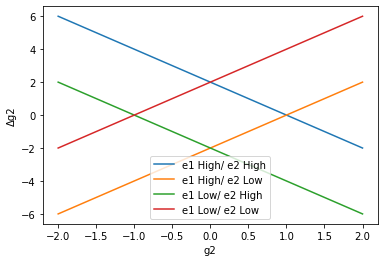

In [65]:
# change in each genetic factor as a function of itself when early/late environments are high/low (+/-) stress
delta_g2_highhigh = lambdify(g2, Q_1_cov0[1].subs([(P22, 1), (g3, 1), (e1, 1), (e2, 1)]), 'numpy')
delta_g2_lowhigh  = lambdify(g2, Q_1_cov0[1].subs([(P22, 1), (g3, 1), (e1,-1), (e2, 1)]), 'numpy')
delta_g2_highlow  = lambdify(g2, Q_1_cov0[1].subs([(P22, 1), (g3, 1), (e1, 1), (e2,-1)]), 'numpy')
delta_g2_lowlow   = lambdify(g2, Q_1_cov0[1].subs([(P22, 1), (g3, 1), (e1,-1), (e2,-1)]), 'numpy')

g2_range = np.linspace(-2, 2, 100)

fig, ax = plt.subplots()
ax.plot(g2_range, delta_g2_highhigh(g2_range), label='e1 High/ e2 High')
ax.plot(g2_range, delta_g2_highlow(g2_range), label='e1 High/ e2 Low')
ax.plot(g2_range, delta_g2_lowhigh(g2_range), label='e1 Low/ e2 High')
ax.plot(g2_range, delta_g2_lowlow(g2_range), label='e1 Low/ e2 Low')
ax.set_xlabel('g2')
ax.set_ylabel('Δg2')
ax.legend()

$g_2$, the parameter that determines the left/right positioning of the phenotypic curve increases has an unstable behavior. When late-life stress is high, the evolution of $g_2$ shows negative feedback and will always move toward the value of $e_2$. When $e_2$ is low, $g_2$'s evolution exhibits positive feedback.

The change in the phenotypic curvature is not a function of $g_3$, so instead examine how it is influenced by the value of $g_2$, which governs by how much minimum reactivity is offset from the early environment

In [66]:
Q_1_cov0[2]

-1.0*P33*e2*(e1 - g2)**2

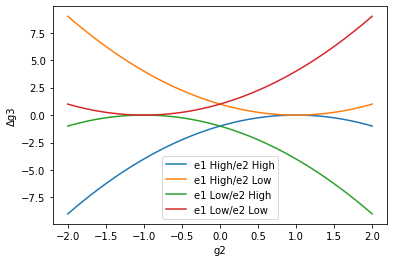

In [70]:
# change in each genetic factor as a function of itself when early/late environments are high/low (+/-) stress
delta_g3_highhigh = lambdify(g2, Q_1_cov0[2].subs([(P33, 1), (g3, 1), (e1, 1), (e2, 1)]), 'numpy')
delta_g3_lowhigh  = lambdify(g2, Q_1_cov0[2].subs([(P33, 1), (g3, 1), (e1,-1), (e2, 1)]), 'numpy')
delta_g3_highlow  = lambdify(g2, Q_1_cov0[2].subs([(P33, 1), (g3, 1), (e1, 1), (e2,-1)]), 'numpy')
delta_g3_lowlow   = lambdify(g2, Q_1_cov0[2].subs([(P33, 1), (g3, 1), (e1,-1), (e2,-1)]), 'numpy')

g3_range = np.linspace(0, 3, 100)

fig, ax = plt.subplots()
ax.plot(g2_range, [delta_g3_highhigh(g2) for g2 in g2_range], label='e1 High/e2 High')
ax.plot(g2_range, [delta_g3_highlow(g2) for g2 in g2_range], label='e1 High/e2 Low')
ax.plot(g2_range, [delta_g3_lowhigh(g2) for g2 in g2_range], label='e1 Low/e2 High')
ax.plot(g2_range, [delta_g3_lowlow(g2) for g2 in g2_range], label='e1 Low/e2 Low')
ax.set_xlabel('g2')
ax.set_ylabel('Δg3')
ax.legend()

The change in $g_3$ is 0 when $g_2 = e_1$. Otherwise, curvature increases when late-life stress $e_2$ is low and decreases when $e_2$ is high.

### Simulation

Simulation change in system for different starting values of the genetic and environmental parameters

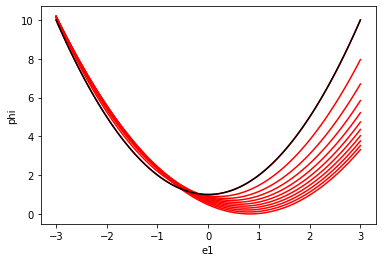

In [130]:
params_start = {g1: 1, g2: 0, g3: 1, e1: 1, e2: 1, P11: 0.1, P22: 0.1, P33: 0.1, P44: 0, P12: 0, P13: 0, P14: 0, P23: 0, P24:0, P34: 0}

def evolve(params):
    delta_P_1 = Q_1.subs(params)
    new_params = params.copy()
    new_params[g1] = params[g1] + delta_P_1[0]
    new_params[g2] = params[g2] + delta_P_1[1]
    new_params[g3] = params[g3] + delta_P_1[2]
    return(new_params)

# evolve for 10 generations
param_history = [params_start]
for i in range(10):
    param_history.append(evolve(param_history[i]))

def plot_param_history(param_history):
    fig, ax = plt.subplots()
    for i in range(len(param_history)):
        graph_params = param_history[i].copy()
        del graph_params[e1]
        phi_r_params = lambdify(e1, phi_r.subs(graph_params), 'numpy')
        ax.plot(e1_range, phi_r_params(e1_range), color='red')
        ax.set_xlabel('e1')
        ax.set_ylabel('phi')
    graph_params = param_history[0].copy()
    del graph_params[e1]
    phi_r_params = lambdify(e1, phi_r.subs(graph_params), 'numpy')
    ax.plot(e1_range, phi_r_params(e1_range), color='black')

plot_param_history(param_history)

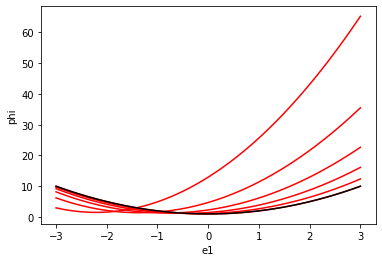

In [132]:
params_start = {g1: 1, g2: 0, g3: 1, e1: 1, e2: -1, P11: 0.1, P22: 0.1, P33: 0.1, P44: 0, P12: 0, P13: 0, P14: 0, P23: 0, P24:0, P34: 0}

# evolve for 10 generations
param_history = [params_start]
for i in range(5):
    param_history.append(evolve(param_history[i]))

plot_param_history(param_history)

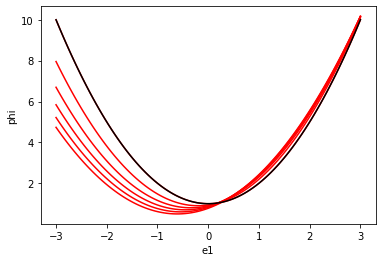

In [133]:
params_start = {g1: 1, g2: 0, g3: 1, e1: -1, e2: 1, P11: 0.1, P22: 0.1, P33: 0.1, P44: 0, P12: 0, P13: 0, P14: 0, P23: 0, P24:0, P34: 0}

# evolve for 10 generations
param_history = [params_start]
for i in range(5):
    param_history.append(evolve(param_history[i]))

plot_param_history(param_history)

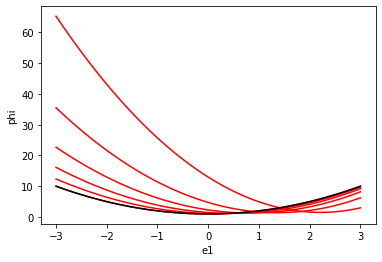

In [134]:
params_start = {g1: 1, g2: 0, g3: 1, e1: -1, e2: -1, P11: 0.1, P22: 0.1, P33: 0.1, P44: 0, P12: 0, P13: 0, P14: 0, P23: 0, P24:0, P34: 0}

# evolve for 10 generations
param_history = [params_start]
for i in range(5):
    param_history.append(evolve(param_history[i]))

plot_param_history(param_history)

D tensors

D2

$$D^2 = \begin{bmatrix} 0 & 0 & 0 &0 \\ 0 & 2g_3 & -2(e_1-g_2) & -2g_3\\ 0 & -2(e_1-g_2) & 0 & 2(e_1-g_2)\\ 0 & -2g_3 & 2(e_1-g_2) & 2g_3 \end{bmatrix}$$

$$\begin{eqnarray*} \langle P^3, D^1 \rangle_{i,i} & = & P_{1ii} - 2(e_1 - g_2)g_3 P_{2ii} + \\ & & (e_1 - g_2)^2 P_{3ii} + 2(e_1 - g^2) g_3 P_{4ii} \end{eqnarray*}$$

$$\begin{eqnarray*} \langle P^4, D^2 \rangle_{2,2} & = & 2 g_3 P_{2222} - 4g_3 P_{2224} + \\ & & 2 g_3 P_{2244} \\ \langle P^4, D^2 \rangle_{2,4} & = & 2 g_3 P_{2224} - 4g_3 P_{2244} + \\ & & 2 g_3 P_{2444} \end{eqnarray*}$$

1. Koolhaas JM et al. 1997 Neuroscience and Biobehavioral Reviews 23: 925-935.   
2. Lesch KP et al. 1996. Science 274: 1527-1531.
3. Suomi S. 2006. Annals of the New York Academy of Science 1994: 52-62.
4. Boyce WT & Ellis BJ. 2005. Development and Psychopathology 17: 271-301.
5. Boyce BJ, Essex MJ, & Boyce WT. 2005. Development and Psychopathology 17: 303-328.
6. Ellis BJ & Boyce WT. 2008. Current Directions in Psychological Science 17: 183-187.     
7. Del Guidice M, Ellis BJ, & Shirtcliff EA. 2011.
8.  Rice SH. 2004. Evolutionary theory. Sunderland, Mass: Sinauer. 